In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import griddata
from matplotlib.gridspec import GridSpec
import struct
from matplotlib.patches import Circle, PathPatch


V = np.genfromtxt("Meshdata/VerticesRing8.txt")
T = np.genfromtxt("Meshdata/FacesRing8.txt")

n_v = len(V)
n_t = len(T)

#for i in range(0, n_t , 1):
#        for j in range( 0, 3 , 1):
#                k = int(T[i][j])
#                l = int(T[i][(j+1)%3])
#                plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='black', alpha=0.4)
#for i in range(0,n_v,1):
#    plt.scatter(V[i][0],V[i][1], color='r', marker='o')
#plt.show()



Sol = np.genfromtxt("Solutions/PoissonGaussSolutionRing8.txt")

In [2]:
def InterpolationPlot( Vertices , Values, Title, Triangulation):
    #define grid
    xi = np.linspace(0.,1.,1001)
    yi = np.linspace(0.,1.,1001)
    # grid the data
    zi = griddata( Vertices , Values, (xi[None,:], yi[:,None]), method='cubic')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS1 = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS2 = plt.contourf(xi,yi,zi,15,cmap='plasma',alpha=0.5)
    plt.clabel(CS1, inline=True)
    plt.colorbar() # draw colorbar
    # plot data points.
    #plt.scatter(V[::,:1:],V[::,1::],marker='o',c='b',s=10,alpha=.5)
    #for i in range(0, len(Triangulation) , 1):
    #    for j in range( 0, 3 , 1):
    #            k = int(Triangulation[i][j])
    #            l = int(Triangulation[i][(j+1)%3])
    #            plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='grey',alpha=0.3)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(Title)



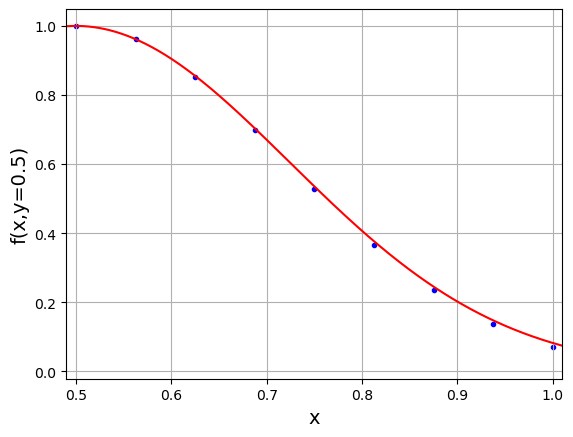

In [3]:
RadialValues = []
for i in range(0,len(V)):
    if( V[i][1]==0.5 and V[i][0]>=0.5 ):
        RadialValues.append( (V[i][0] , Sol[i]) )

X = np.linspace(0.4,1.1,1000)
Y = np.array(RadialValues)
constant = np.min(Y[::,1::])
constant2 = 1 - np.max(Y[::,1::])
constant3 = math.exp(-2.5)-constant
plt.grid()
#plt.ylim(-7.1,5.5)
for i in range(0, len(RadialValues)):
    plt.scatter( RadialValues[i][0], RadialValues[i][1]+constant2, c='b', marker='.')
plt.plot(X, np.exp(-10.*(X-0.5)**2), c='r')
plt.xlabel('x',fontsize=14)
plt.xlim(0.49,1.01)
plt.ylabel(r'f(x,y=0.5)',fontsize=14)
plt.show()

Val = np.array(RadialValues)

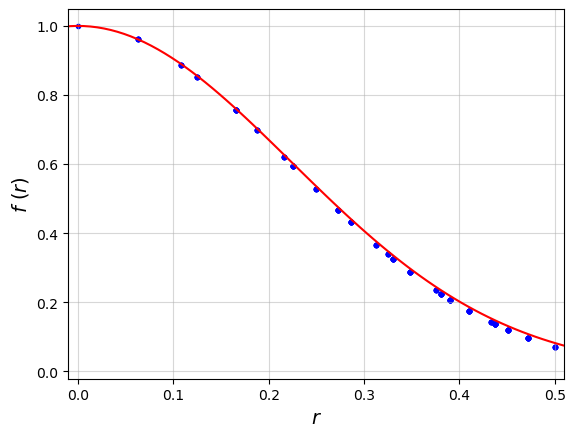

In [4]:
X = np.linspace(-0.1,0.6,100)
plt.grid(alpha=0.5)
plt.plot(X, np.exp(-10.*(X)**2), c='r')
for i in range(0,len(V)):
    r = ((V[i][0]-0.5)**2 + (V[i][1]-0.5)**2)**0.5
    plt.scatter(r,Sol[i]+constant2,color='b',marker='.')
plt.xlabel('$r$',fontsize=14)
plt.xlim(-0.01,0.51)
plt.ylabel('$f\ (r)$',fontsize=14)
plt.show()

Text(0, 0.5, 'y')

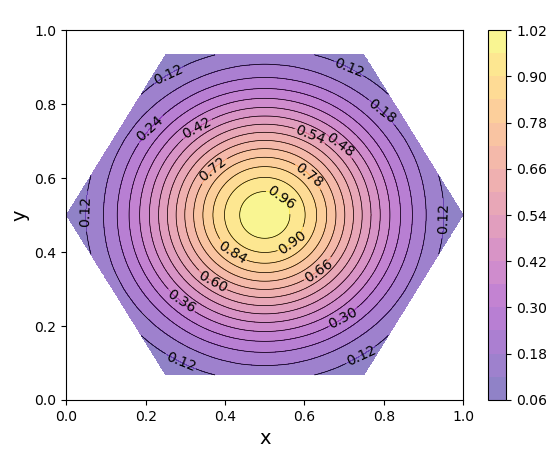

In [5]:

InterpolationPlot( V , Sol +constant2, " ", T)
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)

Text(0, 0.5, '$\\sqrt{|\\,\\mathrm{lg}\\left(f\\,(r)\\right)\\,|}$')

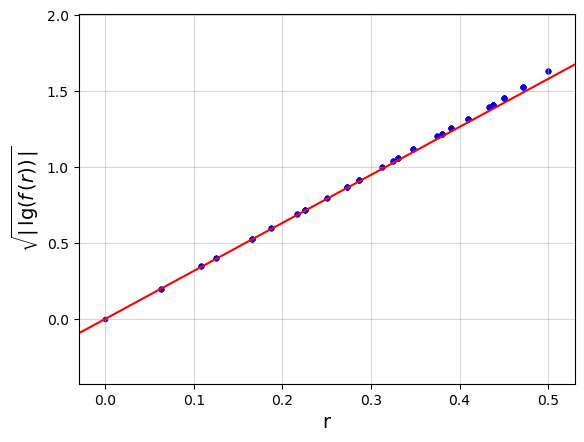

In [35]:
def InterpolationPlot2( Vertices , Values, Title, Triangulation):
    #define grid
    xi = np.linspace(0.,1.,1001)
    yi = np.linspace(0.,1.,1001)
    # grid the data
    zi = griddata( Vertices , Values, (xi[None,:], yi[:,None]), method='cubic')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS1 = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS2 = plt.contourf(xi,yi,zi,15,cmap='jet_r',alpha=0.5)
    #plt.clabel(CS1, inline=True)
    plt.colorbar() # draw colorbar
    # plot data points.
    #plt.scatter(V[::,:1:],V[::,1::],marker='o',c='b',s=10,alpha=.5)
    #for i in range(0, len(Triangulation) , 1):
    #    for j in range( 0, 3 , 1):
    #            k = int(Triangulation[i][j])
    #            l = int(Triangulation[i][(j+1)%3])
    #            plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='grey',alpha=0.3)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(Title)




def AnaPot( x,y ):
    r = ((x-0.5)**2 + (y-0.5)**2)**0.5
    Val = math.exp(-10.*r**2)
    return Val

Error = []
for i in range(0,len(Sol)):
    Error.append((Sol[i]+constant2-AnaPot(V[i][0],V[i][1]))/AnaPot(V[i][0],V[i][1]))

plt.grid(alpha=0.5)
for i in range(0,len(V)):
    r = ((V[i][0]-0.5)**2 + (V[i][1]-0.5)**2)**0.5
    plt.scatter(r,math.sqrt(abs(math.log(Sol[i]+constant2))),color='b',marker='.')
plt.plot(X, math.sqrt(10)*X, color='r' )
plt.xlim(-0.03,0.53)
plt.xlabel('r', fontsize=14)
plt.ylabel(r'$\sqrt{|\,\mathrm{lg}\left(f\,(r)\right)\,|}$', fontsize=14)

Text(0, 0.5, 'y')

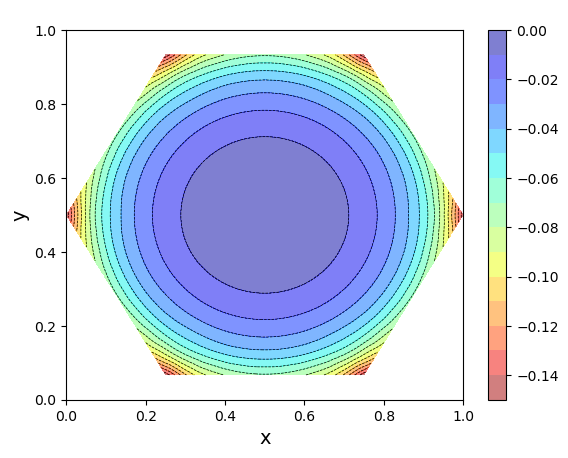

In [7]:
InterpolationPlot2(V , Error , " ", T)
plt.xlabel('x',fontsize=14)
plt.ylabel('y', fontsize=14)

(-0.01, 0.51)

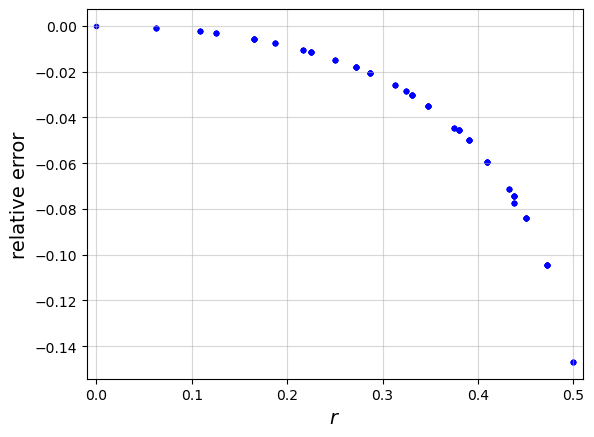

In [8]:
plt.grid(alpha=0.5)
for i in range(0,len(V)):
    r = ((V[i][0]-0.5)**2 + (V[i][1]-0.5)**2)**0.5
    plt.scatter( r , Error[i] , color='b', marker='.')
    
plt.xlabel(r'$r$',fontsize=14)
plt.ylabel('relative error', fontsize=14)
plt.xlim(-0.01,0.51)


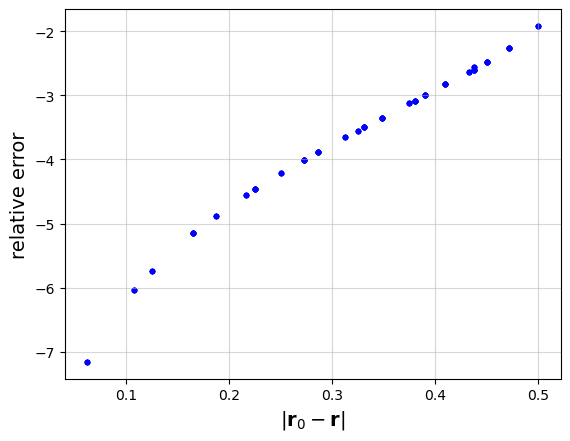

Text(0, 0.5, 'relative error')

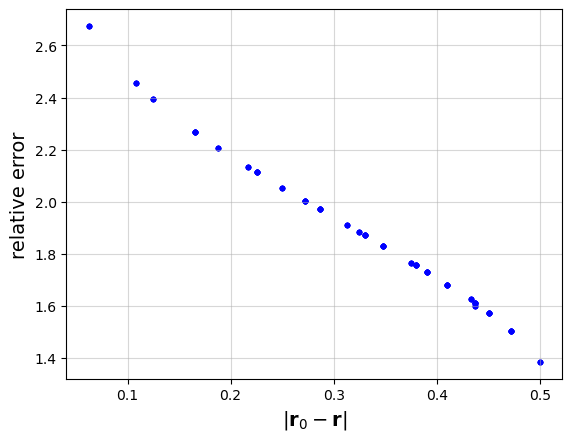

In [17]:
plt.grid(alpha=0.5)
for i in range(1,len(V)):
    r = ((V[i][0]-0.5)**2 + (V[i][1]-0.5)**2)**0.5
    plt.scatter( r ,math.log(abs(Error[i])) , color='b', marker='.')
    
plt.xlabel(r'$|\mathbf{r}_0 - \mathbf{r}|$',fontsize=14)
plt.ylabel('relative error', fontsize=14)
plt.show() 

plt.grid(alpha=0.5)
for i in range(1,len(V)):
    r = ((V[i][0]-0.5)**2 + (V[i][1]-0.5)**2)**0.5
    plt.scatter( r ,math.sqrt(abs(math.log(abs(Error[i])))) , color='b', marker='.')
    
plt.xlabel(r'$|\mathbf{r}_0 - \mathbf{r}|$',fontsize=14)
plt.ylabel('relative error', fontsize=14)